# Lab 4

In [21]:
import pandas
import configparser
import psycopg2

In [22]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [25]:
cur=conn.cursor()


In [4]:
q1_sql = """
        select * from gp13.student
        """

In [5]:
df=pandas.read_sql_query(q1_sql,conn)
df[:]

,s_email,s_name,s_major
0,MTemail.com,Matt Traver,IA
1,JCemail.com,Josie Carter,IA
2,Ggemail.com,Greg Gersony,IA
3,Griffemail,Griffin Boag,IA
4,dudeman.com,Some dood,IA


In [6]:
q2_sql = """
        select gp13.professor.p_name,
        gp13.course.c_name
        from gp13.professor
        inner join gp13.course
        on gp13.professor.p_email = gp13.course.p_email
        """

In [7]:
df=pandas.read_sql_query(q2_sql,conn)
df[:]

,p_name,c_name
0,Dr. Walton,Intro course To IA
1,Dr. Marrin,seminar
2,Dr. Hendrickson,counterfactual reasoning
3,Xuebin Wei,Data mining


In [8]:
q3_sql = """
        select c_number,
        count(c_number) as num_enroll
        from gp13.enroll_list
        group by c_number
        """

In [9]:
df=pandas.read_sql_query(q3_sql,conn)
df[:]

,c_number,num_enroll
0,IA 340,2
1,HUM 200,1
2,IA 313,4
3,IA 300,3


<AxesSubplot:xlabel='c_number'>

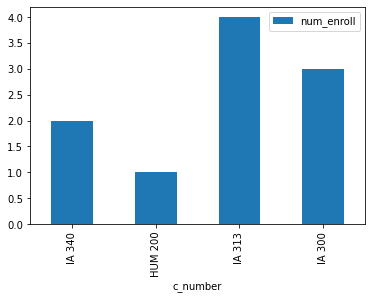

In [10]:
df.plot.bar(x='c_number',y='num_enroll')

In [11]:
q4_sql = """
        select gp13.professor.p_name,
        count(gp13.course.c_name) as num_course
        from gp13.professor
        inner join gp13.course
        on gp13.professor.p_email = gp13.course.p_email
        group by gp13.professor.p_name
        """

In [12]:
df=pandas.read_sql_query(q4_sql,conn)
df[:]

,p_name,num_course
0,Xuebin Wei,1
1,Dr. Marrin,1
2,Dr. Walton,1
3,Dr. Hendrickson,1


<AxesSubplot:xlabel='p_name'>

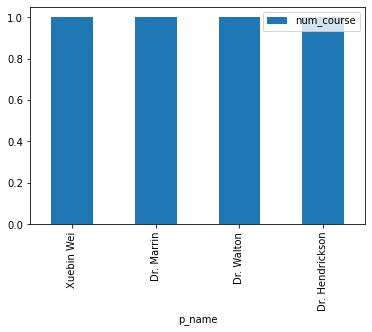

In [13]:
df.plot.bar(x='p_name',y='num_course')

In [23]:
q5_insert_professor_sql = """
            insert into gp13.professor(p_email,p_name,p_office)
            values('{}','{}','{}')
            """.format('new_lab4_email','new_p_lab4_name','new_lab4_o')
print(q5_insert_professor_sql)


            insert into gp13.professor(p_email,p_name,p_office)
            values('new_lab4_email','new_p_lab4_name','new_lab4_o')
            


In [26]:
cur.execute(q5_insert_professor_sql)

In [27]:
conn.commit()

In [29]:
df=pandas.read_sql_query('select * from gp13.professor',conn)
df[:]

,p_email,p_name,p_office
0,Weixx@jmu.edu,Xuebin Wei,hhs112
1,hendrinx@jmu.edu,Dr. Hendrickson,virtual 4
2,marrinsp@jmu.edu,Dr. Marrin,Virtual 2
3,waltontr@jmu.edu,Dr. Walton,Virtual 5
4,p_new_e,p_new_n,p_new_o
5,new_lab4_email,new_p_lab4_name,new_lab4_o


In [30]:
q5_insert_course_sql = """
            insert into gp13.course(c_number,c_name,c_room,p_email)
            values('{}','{}','{}','{}')
            """.format('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
print(q5_insert_course_sql)


            insert into gp13.course(c_number,c_name,c_room,p_email)
            values('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
            


In [31]:
cur.execute(q5_insert_course_sql)

In [32]:
conn.commit()

In [33]:
df=pandas.read_sql_query('select * from gp13.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,HUM 200,Intro course To IA,204,waltontr@jmu.edu
1,IA 300,seminar,150,marrinsp@jmu.edu
2,IA 313,counterfactual reasoning,1240,hendrinx@jmu.edu
3,IA 340,Data mining,336,Weixx@jmu.edu
4,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


In [34]:
q6_update_course_sql ="""
                    update gp13.course
                    set p_email = '{}'
                    where p_email ='{}'
                    """.format('new_lab4_email','t2@jmu.edu')

In [35]:
cur.execute(q6_update_course_sql)

In [36]:
df=pandas.read_sql_query('select * from gp13.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,HUM 200,Intro course To IA,204,waltontr@jmu.edu
1,IA 300,seminar,150,marrinsp@jmu.edu
2,IA 313,counterfactual reasoning,1240,hendrinx@jmu.edu
3,IA 340,Data mining,336,Weixx@jmu.edu
4,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


In [37]:
q6_delete_professor_sql = """
                            delete from gp13.professor
                            where p_email='{}'
                            """.format('t2@jmu.edu')

In [38]:
cur.execute(q6_delete_professor_sql)

In [39]:
conn.commit()

In [40]:
df=pandas.read_sql_query('select * from gp13.professor',conn)
df[:]

,p_email,p_name,p_office
0,Weixx@jmu.edu,Xuebin Wei,hhs112
1,hendrinx@jmu.edu,Dr. Hendrickson,virtual 4
2,marrinsp@jmu.edu,Dr. Marrin,Virtual 2
3,waltontr@jmu.edu,Dr. Walton,Virtual 5
4,p_new_e,p_new_n,p_new_o
5,new_lab4_email,new_p_lab4_name,new_lab4_o


In [41]:
cur.close()

In [42]:
conn.close()
